In [1]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
time_window = 20
batch_size = 32 # 128: anil kag

ckpt_dir = 'copymemory_04_2025_tests'

dataset = 'multiaddtask'

num_epochs = 300 # important: epochs here refer to iteration steps

dataset_size = batch_size*num_epochs

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   dataset_size = dataset_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

Initializing GPU cache for 9600 samples...
Cache initialized in 1.66 seconds
Initializing GPU cache for 32 samples...
Cache initialized in 0.01 seconds
torch.Size([32, 20, 3])
torch.Size([32, 2, 1])


In [3]:
sample = img[0].cpu().numpy()
print(sample)

[[1.0000000e-01 1.3179660e-01 1.4447616e-01]
 [6.0000002e-01 1.1407403e-01 2.4161339e-04]
 [5.0000000e-01 1.7614298e-01 1.6993618e-01]
 [8.9999998e-01 1.0000000e+00 1.3843445e-01]
 [3.0000001e-01 1.0000000e+00 9.4627731e-02]
 [4.0000001e-01 1.6300035e-01 1.8357979e-01]
 [3.0000001e-01 9.0256214e-02 2.6698280e-02]
 [6.9999999e-01 4.3741584e-02 1.2692653e-01]
 [6.9999999e-01 1.0000000e+00 1.7776664e-01]
 [3.0000001e-01 1.0000000e+00 1.2673923e-01]
 [6.0000002e-01 5.2406322e-02 1.2867871e-01]
 [8.9999998e-01 1.2457607e-01 1.5498193e-01]
 [6.9999999e-01 6.5617524e-02 8.2281247e-02]
 [8.9999998e-01 2.0131767e-02 8.7912679e-02]
 [8.0000001e-01 7.5196639e-02 5.6979179e-02]
 [2.0000000e-01 4.3167796e-02 1.6166827e-01]
 [6.9999999e-01 1.9185388e-01 1.4935787e-01]
 [1.0000000e-01 2.0947134e-02 8.7910317e-02]
 [6.9999999e-01 7.2457373e-02 1.0000000e+00]
 [6.0000002e-01 1.7888954e-01 1.0000000e+00]]


In [4]:
reference = lbl[0].cpu().numpy()
print(reference)

[[1.2222221]
 [1.2222221]]


TODO: Plot accumulated sum

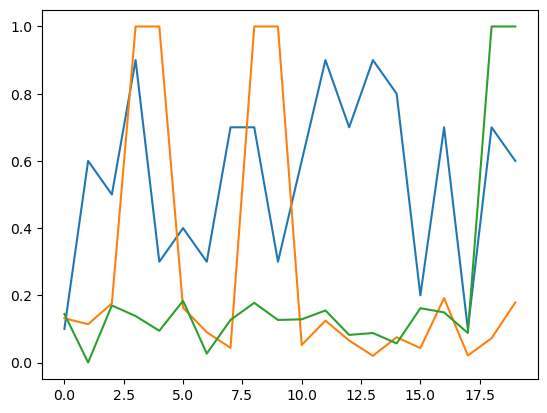

In [5]:
import matplotlib.pyplot as plt
plt.plot(sample)

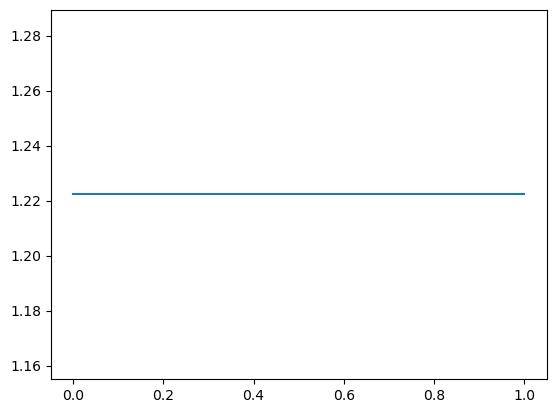

In [6]:
plt.plot(reference)

In [7]:
num_h = 8

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
snn_rnn.to(device)

extra_kwargs = {'delay_range':(18, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
snn_rd.to(device)

Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms
Delta t: 100.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=8, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=144, out_features=8, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=8, out_features=1, bias=False)
    )
  )
)

In [8]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)
train(snn_rnn, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)
train(snn_rd, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=True, lr_tau=lr_tau, printed_steps=100)

Mean Error: 0.0011852884199470282% 
--------------------------


Text(0.5, 1.0, 'train loss')

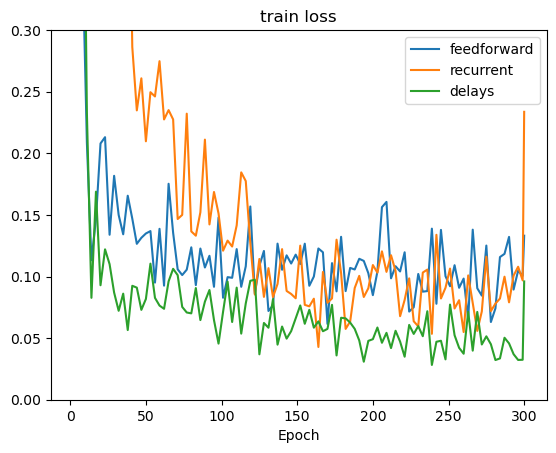

In [9]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 0.3)
plt.title('train loss')